In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('../data/donor_data.csv')

In [3]:
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
##converting the upper case features to lower class to make my eda easier

df.columns = df.columns.str.lower()

In [5]:
df.columns.to_list()

['target_b',
 'target_d',
 'control_number',
 'months_since_origin',
 'donor_age',
 'in_house',
 'urbanicity',
 'ses',
 'cluster_code',
 'home_owner',
 'donor_gender',
 'income_group',
 'published_phone',
 'overlay_source',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'recency_status_96nk',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since

# Data Cleaning and Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   target_b                     19372 non-null  int64  
 1   target_d                     4843 non-null   float64
 2   control_number               19372 non-null  int64  
 3   months_since_origin          19372 non-null  int64  
 4   donor_age                    14577 non-null  float64
 5   in_house                     19372 non-null  int64  
 6   urbanicity                   19372 non-null  object 
 7   ses                          19372 non-null  object 
 8   cluster_code                 19372 non-null  object 
 9   home_owner                   19372 non-null  object 
 10  donor_gender                 19372 non-null  object 
 11  income_group                 14980 non-null  float64
 12  published_phone              19372 non-null  int64  
 13  overlay_source  

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target_b,19372.0,0.250000,0.433024,0.00,0.000,0.000,0.250,1.0
target_d,4843.0,15.624344,12.445137,1.00,10.000,13.000,20.000,200.0
control_number,19372.0,96546.225377,55830.643871,5.00,48289.000,96937.000,145429.500,191779.0
months_since_origin,19372.0,73.409973,41.255574,5.00,29.000,65.000,113.000,137.0
donor_age,14577.0,58.919051,16.669382,0.00,47.000,60.000,73.000,87.0
in_house,19372.0,0.073198,0.260469,0.00,0.000,0.000,0.000,1.0
income_group,14980.0,3.907543,1.864796,1.00,2.000,4.000,5.000,7.0
published_phone,19372.0,0.497729,0.500008,0.00,0.000,0.000,1.000,1.0
mor_hit_rate,19372.0,3.361656,9.503481,0.00,0.000,0.000,3.000,241.0
wealth_rating,10562.0,5.005397,2.815386,0.00,3.000,5.000,7.000,9.0


In [8]:
df.isnull().sum()

target_b                           0
target_d                       14529
control_number                     0
months_since_origin                0
donor_age                       4795
in_house                           0
urbanicity                         0
ses                                0
cluster_code                       0
home_owner                         0
donor_gender                       0
income_group                    4392
published_phone                    0
overlay_source                     0
mor_hit_rate                       0
wealth_rating                   8810
median_home_value                  0
median_household_income            0
pct_owner_occupied                 0
per_capita_income                  0
pct_attribute1                     0
pct_attribute2                     0
pct_attribute3                     0
pct_attribute4                     0
pep_star                           0
recent_star_status                 0
recency_status_96nk                0
f

In [9]:
df['target_d'].value_counts()

10.00     941
15.00     591
20.00     577
5.00      503
25.00     392
         ... 
16.87       1
101.00      1
13.92       1
5.25        1
55.00       1
Name: target_d, Length: 70, dtype: int64

#### Looking at the missing values from the target_d column, it is observed that the values with nan are values from people who didn't donate. Rather that using nan, I will be substituing nan as 0 as those who didn't donate also gave $0 

In [10]:
df['target_d'] = df['target_d'].replace(np.nan, 0)

In [11]:
df.shape

(19372, 50)

In [12]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in df.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print('\n')

target_b
2
[0 1]


target_d
71
[  0.    10.     5.    16.     3.    12.     8.    15.    33.    20.
  25.    35.     2.    11.    18.    40.    21.    32.    30.    14.
  24.    50.    12.5    7.     9.     4.     6.    28.    13.    17.
  27.    36.    22.    23.    31.    19.    48.    75.   100.    47.
  44.    95.     1.   102.   101.    34.    10.7   60.    45.    26.
  17.5   16.87  38.    41.   200.    37.    18.25  29.    51.    46.
  42.     2.5   43.    53.     7.5    5.25  55.     4.5   44.21  13.92
 150.  ]


control_number
19372
[     5     12     37 ... 191746 191775 191779]


months_since_origin
28
[101 137 113  92  89 125  77  65  17  53  41   5  29  19  21 122 127 124
  57 134  54 130  32 115  67 119  40 129]


donor_age
80
[87. 79. 75. nan 74. 63. 71. 41. 73. 81. 76. 69. 45. 43. 55. 77. 37. 52.
 30. 67. 65. 59. 42. 58. 56. 80. 82. 64. 48. 85. 47. 70. 40. 32. 53. 86.
 54. 33. 60. 49.  7. 17. 57. 78. 50. 39. 66. 51. 72. 38. 61. 68. 24. 16.
 84. 44. 34. 83. 35. 29. 26. 2

### Observations
* Age has a value with zero(0) which isn't right
* The Overlay column is meant to take 3 values; M=Metromail; P=Polk; B=Both. But it takes 4 values with the fourth value (4th) value being "n". I am going to assume this was a mistake and replace n with the value n
* Cluster code has a value with ".". This will be replaced with the most apporopriate method
* Donor Gender takes 4 values. Male, Female, Unknown and A. I am assuming the A value is a mistake as it takes one (1) value. It will be replaced appropriately
* "?" represents unknown wherever found


In [13]:
#Checking out the datatypes of the features
df.info()

print("\n----------\nCategorical variables values:")
#List values for categorical variables
for name, values in df.iteritems():
    if(values.dtype != np.float64 and values.dtype != np.int64):
        print('{name}: {value}\n'.format(name=name, value=values.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   target_b                     19372 non-null  int64  
 1   target_d                     19372 non-null  float64
 2   control_number               19372 non-null  int64  
 3   months_since_origin          19372 non-null  int64  
 4   donor_age                    14577 non-null  float64
 5   in_house                     19372 non-null  int64  
 6   urbanicity                   19372 non-null  object 
 7   ses                          19372 non-null  object 
 8   cluster_code                 19372 non-null  object 
 9   home_owner                   19372 non-null  object 
 10  donor_gender                 19372 non-null  object 
 11  income_group                 14980 non-null  float64
 12  published_phone              19372 non-null  int64  
 13  overlay_source  

In [14]:
#rename TARGET_B AS Donated
df.rename(columns={'target_b':'donated', 'target_d': 'amount_donated'}, inplace=True)

0    14529
1     4843
Name: donated, dtype: int64

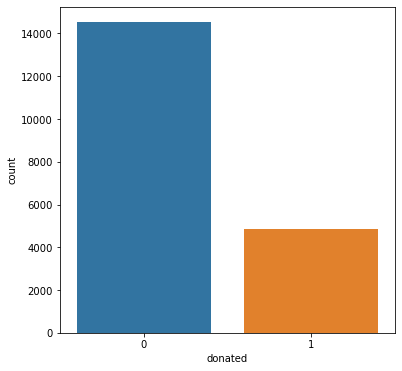

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='donated', data=df)

df['donated'].value_counts()
# From the data, we can see that non-donors outnumber actual donors at almost 3 to 1
# From here we can see the amount of non-donors to donors in our dataset

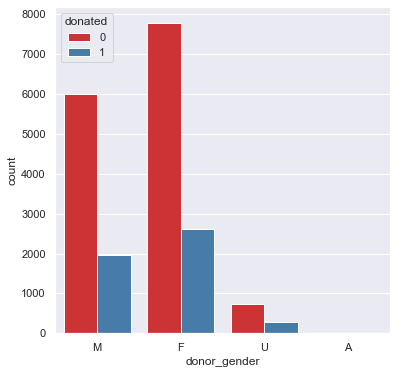

F    10401
M     7953
U     1017
A        1
Name: donor_gender, dtype: int64

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='donor_gender',
              hue='donated',
              data=df,
             palette='Set1')
plt.show()

df['donor_gender'].value_counts()
# This graph shows us that a significant portion of the male and females fall as non-donors

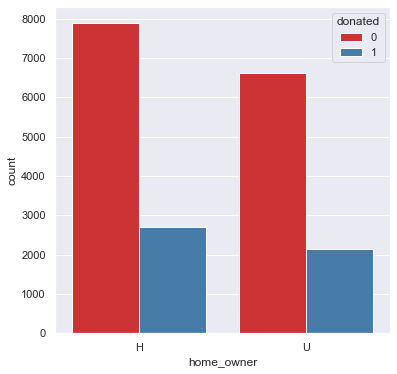

H    10606
U     8766
Name: home_owner, dtype: int64

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='home_owner',
              hue='donated',
              data=df,
             palette='Set1')
plt.show()

df['home_owner'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

<AxesSubplot:ylabel='Frequency'>

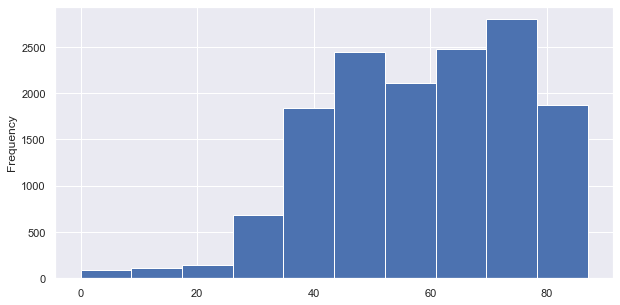

In [18]:
df['donor_age'].plot.hist(figsize=(10,5))
# This shows us that most of the donors fall betweeen the ages of 30 - 80 
# This gives us valuable information o who to target based on age

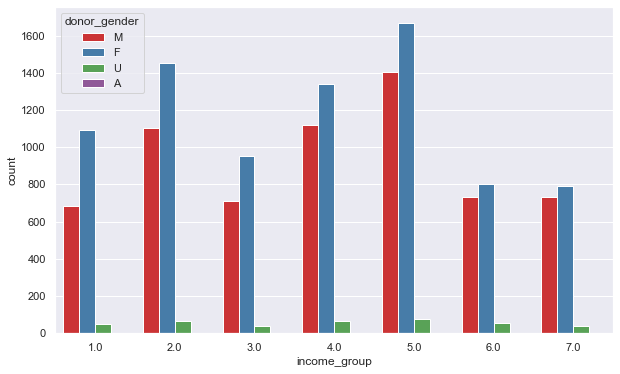

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x='income_group',
              hue='donor_gender',
              data=df,
             palette='Set1')
plt.show()
# This graph shows us that across all income groups,females out earn the men. They will also make for a group to target

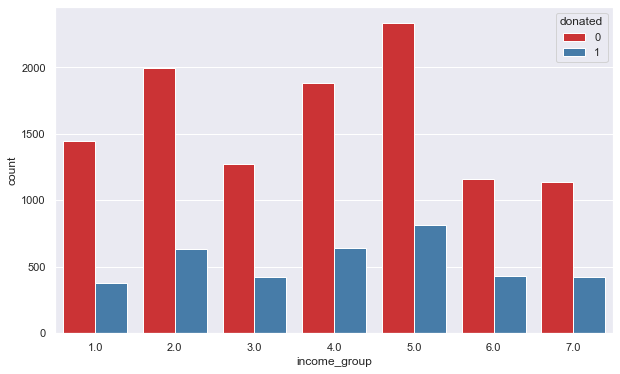

5.0    3149
2.0    2626
4.0    2526
1.0    1822
3.0    1699
6.0    1591
7.0    1567
Name: income_group, dtype: int64

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x='income_group',
              hue='donated',
              data=df,
             palette='Set1')
plt.show()
df['income_group'].value_counts()

#### It is interesting to see that the on the income group column, users with the income group of level 5 donate more than any other income group. Also level 5 income group users do not donate as much as other income groups. This could as a result of most users falling into income group of level 5

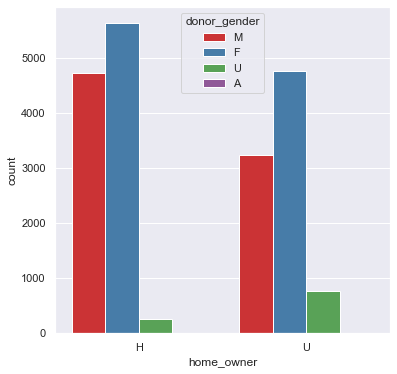

H    10606
U     8766
Name: home_owner, dtype: int64

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='home_owner',
              hue='donor_gender',
              data=df,
             palette='Set1')
plt.show()
df['home_owner'].value_counts()
# We also observe that on average females own more homes than men

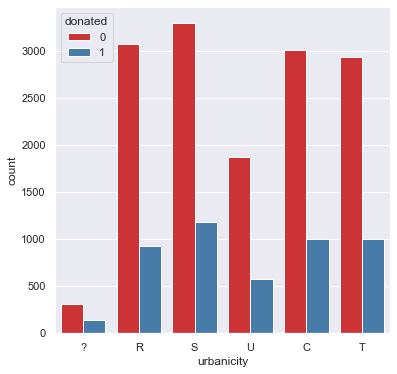

S    4491
C    4022
R    4005
T    3944
U    2456
?     454
Name: urbanicity, dtype: int64

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='urbanicity',
              hue='donated',
              data=df,
             palette='Set1')
plt.show()

df['urbanicity'].value_counts()
# We observe that the users most likely to donate live in suburban areas. 
# This makes sense as most of this demographic fall between the older age brackets as seen before when we checked age of donors

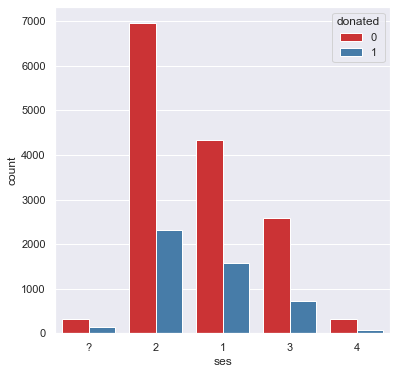

2    9284
1    5924
3    3323
?     454
4     387
Name: ses, dtype: int64

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='ses',
              hue='donated',
              data=df,
             palette='Set1')
plt.show()

df['ses'].value_counts()
# This shows that most of the people likely to donate fall into the second social economic status bracket

<AxesSubplot:ylabel='Frequency'>

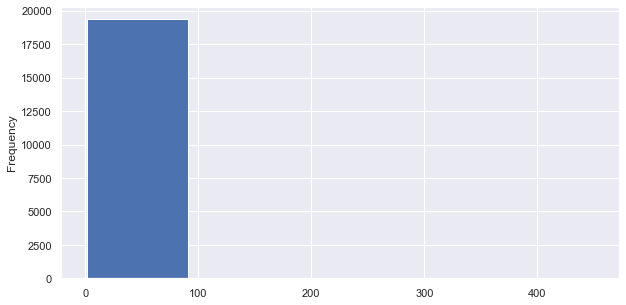

In [24]:
df['lifetime_avg_gift_amt'].plot.hist(bins=5, figsize=(10,5))
# This metric is to show us the average gift amount from donors. From the graph we can see the that this amount is close to a 100

<AxesSubplot:ylabel='Frequency'>

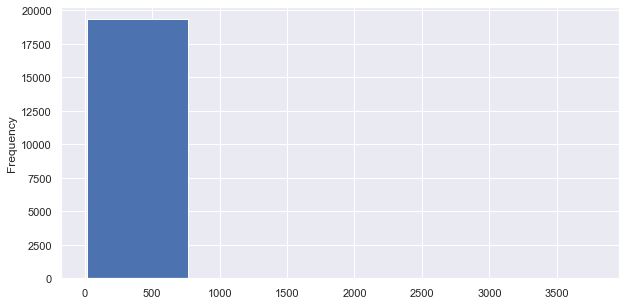

In [25]:
df['lifetime_gift_amount'].plot.hist(bins=5, figsize=(10,5))
# This metric is to show us the overall gift amount from donors. From the graph we can see the that this amount is close to a 100

## Dealing with Missing Data and Miscellenous Data

In [26]:
df.isnull().sum()

donated                           0
amount_donated                    0
control_number                    0
months_since_origin               0
donor_age                      4795
in_house                          0
urbanicity                        0
ses                               0
cluster_code                      0
home_owner                        0
donor_gender                      0
income_group                   4392
published_phone                   0
overlay_source                    0
mor_hit_rate                      0
wealth_rating                  8810
median_home_value                 0
median_household_income           0
pct_owner_occupied                0
per_capita_income                 0
pct_attribute1                    0
pct_attribute2                    0
pct_attribute3                    0
pct_attribute4                    0
pep_star                          0
recent_star_status                0
recency_status_96nk               0
frequency_status_97nk       

### The columns with missing data are
* Donor Age
* Income Group
* Wealth Rating
* Months since last prom Resp

In [27]:
# Checking the datatype of each column
# Before filling missing values, the column dtypes should first be changed to their appriopriate datatype
#
df.dtypes

donated                          int64
amount_donated                 float64
control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status       

In [28]:
df.shape

(19372, 50)

In [29]:
df['donor_age'] = df['donor_age'].replace(0, np.nan)

In [30]:
df.shape

(19372, 50)

In [31]:
df.isnull().sum()

donated                           0
amount_donated                    0
control_number                    0
months_since_origin               0
donor_age                      4797
in_house                          0
urbanicity                        0
ses                               0
cluster_code                      0
home_owner                        0
donor_gender                      0
income_group                   4392
published_phone                   0
overlay_source                    0
mor_hit_rate                      0
wealth_rating                  8810
median_home_value                 0
median_household_income           0
pct_owner_occupied                0
per_capita_income                 0
pct_attribute1                    0
pct_attribute2                    0
pct_attribute3                    0
pct_attribute4                    0
pep_star                          0
recent_star_status                0
recency_status_96nk               0
frequency_status_97nk       

<AxesSubplot:ylabel='Frequency'>

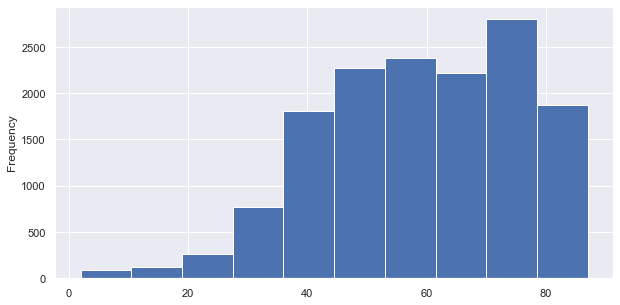

In [32]:
df['donor_age'].plot.hist(figsize=(10,5))

- the data is left-skewed.
- employ median to fill in missing data

<AxesSubplot:xlabel='urbanicity', ylabel='donor_age'>

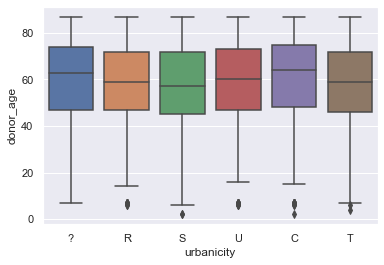

In [33]:
#Plot the variation of urbanicity with age
sns.boxplot(data = df, x = 'urbanicity', y = 'donor_age')

<AxesSubplot:xlabel='donor_gender', ylabel='donor_age'>

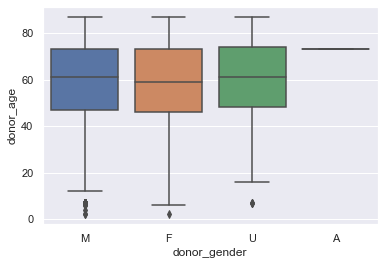

In [34]:
#Plot the variation of urbanicity with age
sns.boxplot(data = df, x = 'donor_gender', y = 'donor_age')

<AxesSubplot:xlabel='home_owner', ylabel='donor_age'>

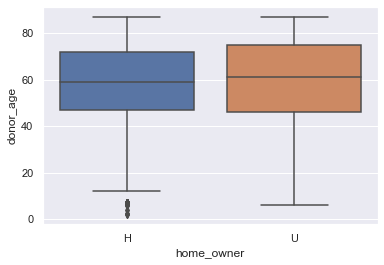

In [35]:
#Plot the variation of urbanicity with age
sns.boxplot(data = df, x = 'home_owner', y = 'donor_age')

In [36]:
#Obtain the median age per location
urbanicity_median = df.groupby('urbanicity')['donor_age'].median()
urbanicity_median

urbanicity
?    63.0
C    64.0
R    59.0
S    57.0
T    59.0
U    60.0
Name: donor_age, dtype: float64

In [37]:
#fill in the missing age values in each location with the median age
for i in df.index:
    if pd.isnull(df.loc[i,'donor_age']):
        if df.loc[i, 'urbanicity'] == '?':
            df.loc[i,'donor_age'] = 63.0
        elif df.loc[i, 'urbanicity'] == 'C':
            df.loc[i,'donor_age'] = 64.0
        elif df.loc[i, 'urbanicity'] == 'R':
            df.loc[i,'donor_age'] = 59.0
        elif df.loc[i, 'urbanicity'] == 'S':
            df.loc[i,'donor_age'] = 57.0
        elif df.loc[i, 'urbanicity'] == 'T':
            df.loc[i,'donor_age'] = 59.0
        elif df.loc[i, 'urbanicity'] == 'U':
            df.loc[i,'donor_age'] = 60.0


<AxesSubplot:ylabel='Frequency'>

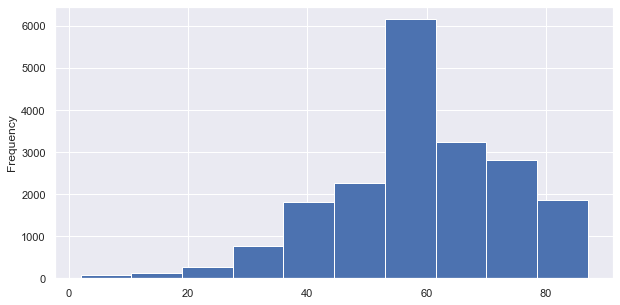

In [38]:
df['donor_age'].plot.hist(figsize=(10,5))

<AxesSubplot:xlabel='urbanicity', ylabel='income_group'>

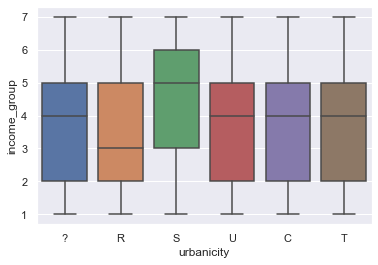

In [39]:
#Plot the variation of urbanicity with income group
sns.boxplot(data = df, x = 'urbanicity', y = 'income_group')

<AxesSubplot:xlabel='donor_gender', ylabel='income_group'>

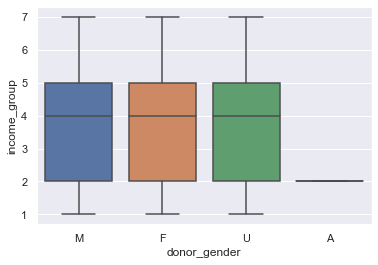

In [40]:
#Plot the variation of donor gender with income group
sns.boxplot(data = df, x = 'donor_gender', y = 'income_group')

<AxesSubplot:xlabel='home_owner', ylabel='income_group'>

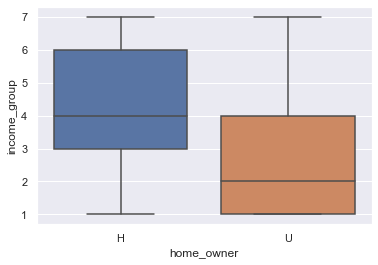

In [41]:
#Plot the variation of home owner with income group
sns.boxplot(data = df, x = 'home_owner', y = 'income_group')

In [42]:
#Check the income group by location 
df.groupby(['urbanicity','income_group'])['income_group'].count()

urbanicity  income_group
?           1.0              30
            2.0              55
            3.0              33
            4.0              66
            5.0              74
            6.0              35
            7.0              30
C           1.0             452
            2.0             647
            3.0             335
            4.0             529
            5.0             640
            6.0             278
            7.0             281
R           1.0             507
            2.0             713
            3.0             472
            4.0             452
            5.0             539
            6.0             180
            7.0             203
S           1.0             243
            2.0             333
            3.0             324
            4.0             634
            5.0             788
            6.0             577
            7.0             566
T           1.0             318
            2.0             590
            3.0

In [43]:
for i in df.index:
    if pd.isnull(df.loc[i,'income_group']):
        if df.loc[i, 'urbanicity'] == '?':
            df.loc[i,'income_group'] = 5
        elif df.loc[i, 'urbanicity'] == 'C':
            df.loc[i,'income_group'] = 2
        elif df.loc[i, 'urbanicity'] == 'R':
            df.loc[i,'income_group'] = 2
        elif df.loc[i, 'urbanicity'] == 'S':
            df.loc[i,'income_group'] = 5
        elif df.loc[i, 'urbanicity'] == 'T':
            df.loc[i,'income_group'] = 5
        elif df.loc[i, 'urbanicity'] == 'U':
            df.loc[i,'income_group'] = 5  
    

<AxesSubplot:ylabel='Frequency'>

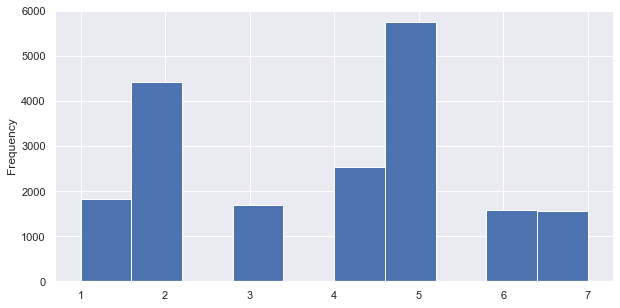

In [44]:
df['income_group'].plot.hist(figsize=(10,5))

In [45]:
df.isnull().sum()

donated                           0
amount_donated                    0
control_number                    0
months_since_origin               0
donor_age                         0
in_house                          0
urbanicity                        0
ses                               0
cluster_code                      0
home_owner                        0
donor_gender                      0
income_group                      0
published_phone                   0
overlay_source                    0
mor_hit_rate                      0
wealth_rating                  8810
median_home_value                 0
median_household_income           0
pct_owner_occupied                0
per_capita_income                 0
pct_attribute1                    0
pct_attribute2                    0
pct_attribute3                    0
pct_attribute4                    0
pep_star                          0
recent_star_status                0
recency_status_96nk               0
frequency_status_97nk       

9.0    1390
8.0    1248
7.0    1199
6.0    1117
5.0    1078
3.0    1046
4.0     987
2.0     974
1.0     854
0.0     669
Name: wealth_rating, dtype: int64

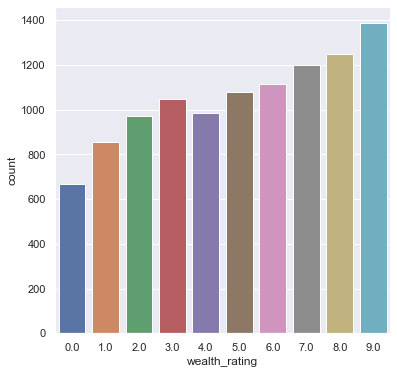

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='wealth_rating', data=df)

df['wealth_rating'].value_counts()
# From the data, we can see that non-donors outnumber actual donors at almost 3 to 1
# From here we can see the amount of non-donors to donors in our dataset

<AxesSubplot:xlabel='urbanicity', ylabel='wealth_rating'>

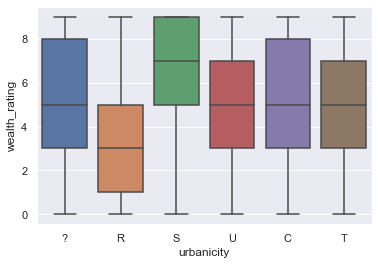

In [47]:
#Plot the variation of urbanicity with wealth rating
sns.boxplot(data = df, x = 'urbanicity', y = 'wealth_rating')

<AxesSubplot:xlabel='donor_gender', ylabel='wealth_rating'>

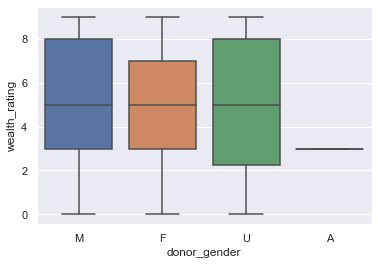

In [48]:
#Plot the variation of donor gender with wealth rating
sns.boxplot(data = df, x = 'donor_gender', y = 'wealth_rating')

<AxesSubplot:xlabel='home_owner', ylabel='wealth_rating'>

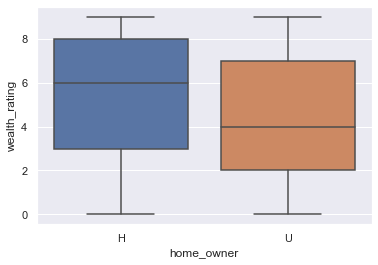

In [49]:
#Plot the variation of home ownership with wealth rating
sns.boxplot(data = df, x = 'home_owner', y = 'wealth_rating')

In [50]:
#Check the wealth rating by location 
df.groupby(['urbanicity','wealth_rating'])['wealth_rating'].count()

urbanicity  wealth_rating
?           0.0               12
            1.0               15
            2.0               29
            3.0               26
            4.0               20
            5.0               17
            6.0               24
            7.0               26
            8.0               31
            9.0               33
C           0.0              182
            1.0              174
            2.0              167
            3.0              190
            4.0              199
            5.0              218
            6.0              217
            7.0              265
            8.0              253
            9.0              295
R           0.0              240
            1.0              367
            2.0              414
            3.0              335
            4.0              278
            5.0              237
            6.0              178
            7.0              129
            8.0               80
            9.0  

In [51]:
for i in df.index:
    if pd.isnull(df.loc[i,'wealth_rating']):
        if df.loc[i, 'urbanicity'] == '?':
            df.loc[i,'wealth_rating'] = 9
        elif df.loc[i, 'urbanicity'] == 'C':
            df.loc[i,'wealth_rating'] = 9
        elif df.loc[i, 'urbanicity'] == 'R':
            df.loc[i,'wealth_rating'] = 2
        elif df.loc[i, 'urbanicity'] == 'S':
            df.loc[i,'wealth_rating'] = 9
        elif df.loc[i, 'urbanicity'] == 'T':
            df.loc[i,'wealth_rating'] = 8
        elif df.loc[i, 'urbanicity'] == 'U':
            df.loc[i,'wealth_rating'] = 6  
    

In [52]:
df.isnull().sum()

donated                          0
amount_donated                   0
control_number                   0
months_since_origin              0
donor_age                        0
in_house                         0
urbanicity                       0
ses                              0
cluster_code                     0
home_owner                       0
donor_gender                     0
income_group                     0
published_phone                  0
overlay_source                   0
mor_hit_rate                     0
wealth_rating                    0
median_home_value                0
median_household_income          0
pct_owner_occupied               0
per_capita_income                0
pct_attribute1                   0
pct_attribute2                   0
pct_attribute3                   0
pct_attribute4                   0
pep_star                         0
recent_star_status               0
recency_status_96nk              0
frequency_status_97nk            0
recent_response_prop

<AxesSubplot:ylabel='Frequency'>

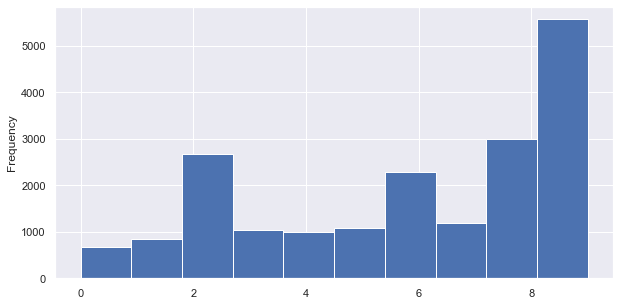

In [53]:
df['wealth_rating'].plot.hist(figsize=(10,5))

In [54]:
df.dtypes

donated                          int64
amount_donated                 float64
control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status       

<AxesSubplot:ylabel='Frequency'>

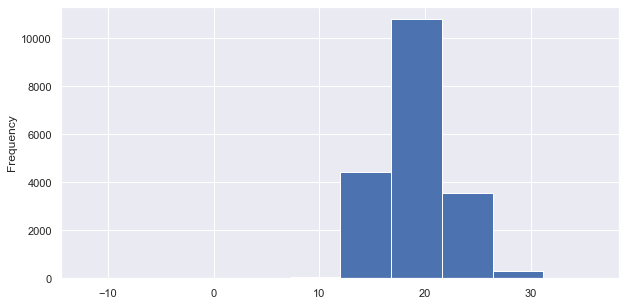

In [55]:
df['months_since_last_prom_resp'].plot.hist(figsize=(10,5))

<AxesSubplot:xlabel='urbanicity', ylabel='months_since_last_prom_resp'>

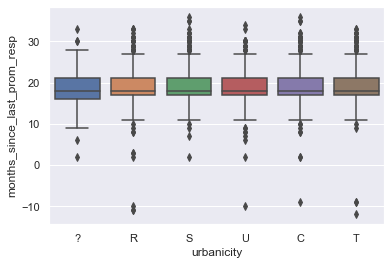

In [56]:
#Plot the variation of urbanicity with Month since last promotion response
sns.boxplot(data = df, x = 'urbanicity', y = 'months_since_last_prom_resp')

<AxesSubplot:xlabel='donor_gender', ylabel='months_since_last_prom_resp'>

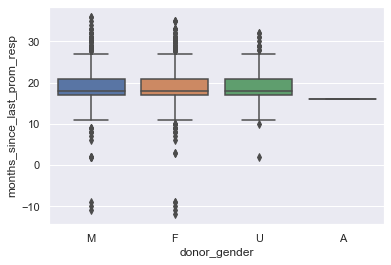

In [57]:
#Plot the variation of donor gender with Month since last promotion response
sns.boxplot(data = df, x = 'donor_gender', y = 'months_since_last_prom_resp')

<AxesSubplot:xlabel='home_owner', ylabel='months_since_last_prom_resp'>

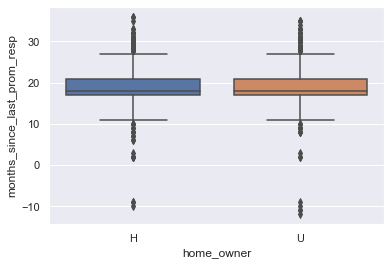

In [58]:
#Plot the variation of home owner with Month since last promotion response
sns.boxplot(data = df, x = 'home_owner', y = 'months_since_last_prom_resp')

In [59]:
#Obtain the median Month since last promotion response per location
months_since_last_prom_resp_urbanicity_median = df.groupby('urbanicity')['months_since_last_prom_resp'].median()
months_since_last_prom_resp_urbanicity_median

urbanicity
?    18.0
C    18.0
R    18.0
S    18.0
T    18.0
U    18.0
Name: months_since_last_prom_resp, dtype: float64

In [60]:
#fill in the missing age values in each location with the median age
for i in df.index:
    if pd.isnull(df.loc[i,'months_since_last_prom_resp']):
        if df.loc[i, 'urbanicity'] == '?':
            df.loc[i,'months_since_last_prom_resp'] = 18
        elif df.loc[i, 'urbanicity'] == 'C':
            df.loc[i,'months_since_last_prom_resp'] = 18
        elif df.loc[i, 'urbanicity'] == 'R':
            df.loc[i,'months_since_last_prom_resp'] = 18
        elif df.loc[i, 'urbanicity'] == 'S':
            df.loc[i,'months_since_last_prom_resp'] = 18
        elif df.loc[i, 'urbanicity'] == 'T':
            df.loc[i,'months_since_last_prom_resp'] = 18
        elif df.loc[i, 'urbanicity'] == 'U':
            df.loc[i,'months_since_last_prom_resp'] = 18


<AxesSubplot:ylabel='Frequency'>

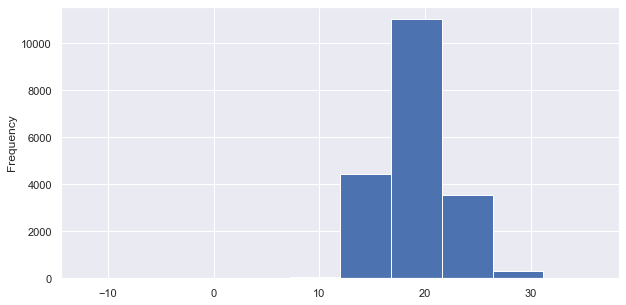

In [61]:
df['months_since_last_prom_resp'].plot.hist(figsize=(10,5))

In [62]:
df.isnull().sum()

donated                        0
amount_donated                 0
control_number                 0
months_since_origin            0
donor_age                      0
in_house                       0
urbanicity                     0
ses                            0
cluster_code                   0
home_owner                     0
donor_gender                   0
income_group                   0
published_phone                0
overlay_source                 0
mor_hit_rate                   0
wealth_rating                  0
median_home_value              0
median_household_income        0
pct_owner_occupied             0
per_capita_income              0
pct_attribute1                 0
pct_attribute2                 0
pct_attribute3                 0
pct_attribute4                 0
pep_star                       0
recent_star_status             0
recency_status_96nk            0
frequency_status_97nk          0
recent_response_prop           0
recent_avg_gift_amt            0
recent_car

## Dealing with miscellaneous data

#### Despite the fact that there are no "missing" values, there are some misellaneous values in the data set like '?' and   ' .'
#### We will deal with them now

In [63]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in df.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print('\n')

donated
2
[0 1]


amount_donated
71
[  0.    10.     5.    16.     3.    12.     8.    15.    33.    20.
  25.    35.     2.    11.    18.    40.    21.    32.    30.    14.
  24.    50.    12.5    7.     9.     4.     6.    28.    13.    17.
  27.    36.    22.    23.    31.    19.    48.    75.   100.    47.
  44.    95.     1.   102.   101.    34.    10.7   60.    45.    26.
  17.5   16.87  38.    41.   200.    37.    18.25  29.    51.    46.
  42.     2.5   43.    53.     7.5    5.25  55.     4.5   44.21  13.92
 150.  ]


control_number
19372
[     5     12     37 ... 191746 191775 191779]


months_since_origin
28
[101 137 113  92  89 125  77  65  17  53  41   5  29  19  21 122 127 124
  57 134  54 130  32 115  67 119  40 129]


donor_age
79
[87. 79. 75. 60. 74. 63. 71. 41. 59. 73. 81. 76. 69. 45. 43. 55. 77. 37.
 52. 30. 64. 67. 65. 42. 57. 58. 56. 80. 82. 48. 85. 47. 70. 40. 32. 53.
 86. 54. 33. 49.  7. 17. 78. 50. 39. 66. 51. 72. 38. 61. 68. 24. 16. 84.
 44. 34. 83. 35. 29. 26. 

In [64]:
df['urbanicity'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
?     454
Name: urbanicity, dtype: int64

### I will be replacing "?" with "X" in the urbanicity column

In [65]:
df['urbanicity'] = df['urbanicity'].replace("?", "X")

In [66]:
df['urbanicity'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
X     454
Name: urbanicity, dtype: int64

In [67]:
df['ses'].value_counts()

2    9284
1    5924
3    3323
?     454
4     387
Name: ses, dtype: int64

### I will be replacing "?" with "5" in the ses column

In [68]:
df['ses'] = df['ses'].replace("?", 5)

In [69]:
df['ses'].value_counts()

2    9284
1    5924
3    3323
5     454
4     387
Name: ses, dtype: int64

In [70]:
df['donor_gender'].value_counts()

F    10401
M     7953
U     1017
A        1
Name: donor_gender, dtype: int64

#### I will be replacing the "A" column with Unknown "U" column as there are only 3 values in the donor gender

In [71]:
df['donor_gender'] = df['donor_gender'].replace("A", "U")

In [72]:
df['donor_gender'].value_counts()

F    10401
M     7953
U     1018
Name: donor_gender, dtype: int64

In [73]:
df['overlay_source'].value_counts()

B    8732
P    4768
N    4392
M    1480
Name: overlay_source, dtype: int64

#### I will be replacing the "N" column with Metromail "M" column as there are only 3 values in the overlay Source column and "N" isn't in the data dictionary. I am assuming that users mistakenly filled "N" as against "M" as they as close to each other on the keyboard

In [74]:
df['overlay_source'] = df['overlay_source'].replace("N", "M")

In [75]:
df['overlay_source'].value_counts()

B    8732
M    5872
P    4768
Name: overlay_source, dtype: int64

In [76]:
df['cluster_code'].value_counts()

40    830
24    795
35    727
36    716
49    675
27    666
12    631
18    619
13    579
30    519
39    512
11    484
45    482
43    468
51    460
14    454
 .    454
41    431
10    387
16    384
44    383
02    380
08    378
46    369
21    353
17    349
28    343
20    317
53    303
03    300
23    293
42    284
34    284
25    273
22    251
31    249
38    240
01    239
15    223
37    204
26    202
05    199
47    185
07    184
48    180
29    170
50    156
09    153
32    152
06    123
04    113
33    109
19     98
52     60
Name: cluster_code, dtype: int64

In [77]:
df['cluster_code'] = df.cluster_code.replace(' .',np.nan)

In [78]:
df.isnull().sum()

donated                          0
amount_donated                   0
control_number                   0
months_since_origin              0
donor_age                        0
in_house                         0
urbanicity                       0
ses                              0
cluster_code                   454
home_owner                       0
donor_gender                     0
income_group                     0
published_phone                  0
overlay_source                   0
mor_hit_rate                     0
wealth_rating                    0
median_home_value                0
median_household_income          0
pct_owner_occupied               0
per_capita_income                0
pct_attribute1                   0
pct_attribute2                   0
pct_attribute3                   0
pct_attribute4                   0
pep_star                         0
recent_star_status               0
recency_status_96nk              0
frequency_status_97nk            0
recent_response_prop

In [79]:
df.dtypes

donated                          int64
amount_donated                 float64
control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status       

In [83]:
df['urbanicity'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
X     454
Name: urbanicity, dtype: int64

In [85]:
df['cluster_code']= df['cluster_code'].fillna(df['cluster_code'].median())

In [86]:
df['cluster_code'].value_counts()

40      830
24      795
35      727
36      716
49      675
27      666
12      631
18      619
13      579
30      519
39      512
11      484
45      482
43      468
51      460
14      454
28.0    454
41      431
10      387
16      384
44      383
02      380
08      378
46      369
21      353
17      349
28      343
20      317
53      303
03      300
23      293
34      284
42      284
25      273
22      251
31      249
38      240
01      239
15      223
37      204
26      202
05      199
47      185
07      184
48      180
29      170
50      156
09      153
32      152
06      123
04      113
33      109
19       98
52       60
Name: cluster_code, dtype: int64

In [87]:
df.dtypes

donated                          int64
amount_donated                 float64
control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status       

In [96]:
df['donor_age'] = df['donor_age'].apply(int)
df['income_group'] = df['income_group'].apply(int)
df['cluster_code'] = df['cluster_code'].apply(int)
df['wealth_rating'] = df['wealth_rating'].apply(int)
df['ses'] = df['ses'].apply(int)
df['months_since_last_prom_resp'] = df['months_since_last_prom_resp'].apply(int)

In [97]:
df.dtypes

donated                          int64
amount_donated                 float64
control_number                   int64
months_since_origin              int64
donor_age                        int64
in_house                         int64
urbanicity                      object
ses                              int64
cluster_code                     int64
home_owner                      object
donor_gender                    object
income_group                     int64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                    int64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status       

In [98]:
df.head()

,donated,amount_donated,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,0.0,5,101,87,0,X,5,28,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,0.0,37,113,75,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,0.0,38,92,60,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,0.0,41,101,74,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [99]:
df.isnull().sum()

donated                        0
amount_donated                 0
control_number                 0
months_since_origin            0
donor_age                      0
in_house                       0
urbanicity                     0
ses                            0
cluster_code                   0
home_owner                     0
donor_gender                   0
income_group                   0
published_phone                0
overlay_source                 0
mor_hit_rate                   0
wealth_rating                  0
median_home_value              0
median_household_income        0
pct_owner_occupied             0
per_capita_income              0
pct_attribute1                 0
pct_attribute2                 0
pct_attribute3                 0
pct_attribute4                 0
pep_star                       0
recent_star_status             0
recency_status_96nk            0
frequency_status_97nk          0
recent_response_prop           0
recent_avg_gift_amt            0
recent_car

In [100]:
df_categorical = df.select_dtypes(include='object')

In [101]:
df_categorical.head()

,urbanicity,home_owner,donor_gender,overlay_source,recency_status_96nk
0,X,H,M,P,A
1,R,H,M,P,S
2,S,H,F,P,S
3,U,H,F,B,A
4,R,U,F,B,A


In [102]:
df_numerical = df.select_dtypes(exclude='object')

In [ ]:
df_numerical.head()